In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
comptages = (
    pd
    .read_csv('datasets/comptages.csv')
    .assign(
        datetime = lambda df: pd.to_datetime(df["Date et heure de comptage"], utc=True, errors='coerce')
    )
)
    
comptages

,Identifiant du compteur,Identifiant du site de comptage,Date et heure de comptage,Comptage horaire,datetime
0,100003096-353242251,100003096,2022-06-01T06:00:00+02:00,27.0,2022-06-01 04:00:00+00:00
1,100003096-353242251,100003096,2022-06-01T09:00:00+02:00,199.0,2022-06-01 07:00:00+00:00
2,100003096-353242251,100003096,2022-06-01T05:00:00+02:00,7.0,2022-06-01 03:00:00+00:00
3,100003096-353242251,100003096,2022-06-01T07:00:00+02:00,76.0,2022-06-01 05:00:00+00:00
4,100003096-353242251,100003096,2022-06-01T19:00:00+02:00,144.0,2022-06-01 17:00:00+00:00
...,...,...,...,...,...
920975,300030271-353356061,300030271,2023-07-23T06:00:00+02:00,2.0,2023-07-23 04:00:00+00:00
920976,300030271-353356061,300030271,2023-07-23T07:00:00+02:00,5.0,2023-07-23 05:00:00+00:00
920977,300030271-353356061,300030271,2023-07-23T11:00:00+02:00,42.0,2023-07-23 09:00:00+00:00
920978,300030271-353356061,300030271,2023-07-23T17:00:00+02:00,15.0,2023-07-23 15:00:00+00:00


In [26]:
top5 = (
    comptages
    .groupby('Identifiant du site de comptage')
    .agg({
        'Comptage horaire': 'sum'
    })
    .sort_values('Comptage horaire', ascending=False)
    .head(5)
)

top5

,Comptage horaire
Identifiant du site de comptage,
100057445,5427069.0
100050876,3690654.0
100056334,2498468.0
100056336,2441982.0
100056335,2413970.0


In [107]:
table = (
    comptages
    .assign(
        Jour = lambda df: df.datetime.dt.day_name(),
        Heure = lambda df: ( df.datetime.dt.hour + 2 ) % 24
    )
    .pivot_table(
        index='Heure',
        columns=["Identifiant du site de comptage", "Jour"],
        values = "Comptage horaire",
        aggfunc="mean"
    )
    [top5.index]
    # .plot
    # .line(
    #     subplots = True
    # )
)

table

Identifiant du site de comptage   100057445                          \
Jour                                 Friday      Monday    Saturday   
Heure                                                                 
0                                214.338983  117.237288  191.788136   
1                                159.305085   56.771186  152.025424   
2                                 69.691667   27.344828  120.406780   
3                                 34.616667   13.550847   74.567797   
4                                 21.708333   10.677966   48.398305   
5                                 24.591667   16.881356   38.440678   
6                                 44.141667   39.008475   35.432203   
7                                110.933333  119.838983   46.762712   
8                                318.550000  391.754237   83.838983   
9                                447.458333  532.254237  138.364407   
10                               349.700000  355.598291  195.703390   
11                               263.241667  227.521368  243.889831   
12                               310.641667  262.470085  299.076271   
13                               327.983333  285.500000  332.381356   
14                               323.183333  279.661017  346.415254   
15                               322.508333  276.525424  385.262712   
16                               357.308333  303.016949  410.288136   
17                               461.425000  419.898305  427.584746   
18                               587.141667  634.194915  444.186441   
19                               623.608333  712.144068  454.593220   
20                               497.933333  515.194915  386.016949   
21                               338.050000  308.279661  280.161017   
22                               253.341667  239.440678  218.983051   
23                               237.166667  200.279661  208.864407   

Identifiant du site de comptage                                      \
Jour                                 Sunday    Thursday     Tuesday   
Heure                                                                 
0                                 86.568966  233.866667  180.788136   
1                                 49.568966  130.558333   87.169492   
2                                124.706897   51.625000   29.550847   
3                                 81.644068   24.358333   14.779661   
4                                 51.288136   16.750000   12.440678   
5                                 39.593220   21.008333   18.245763   
6                                 28.330508   44.658333   44.771186   
7                                 33.008475  135.866667  146.025424   
8                                 54.177966  429.350000  484.805085   
9                                 87.983051  600.358333  647.440678   
10                               143.152542  413.383333  413.423729   
11                               193.601695  275.991667  266.771186   
12                               243.745763  321.166667  301.788136   
13                               268.635593  345.325000  327.805085   
14                               276.677966  341.841667  327.669492   
15                               309.940678  334.925000  319.788136   
16                               339.135593  350.133333  344.347458   
17                               364.906780  472.658333  473.330508   
18                               378.474576  695.416667  726.745763   
19                               361.271186  789.725000  827.932203   
20                               280.262712  612.233333  608.500000   
21                               200.949153  390.625000  363.025424   
22                               169.542373  320.350000  293.966102   
23                               135.440678  308.150000  279.440678   

Identifiant du site de comptage               100050876              \
Jour                              Wednesday      Friday      Monday   
Heure                 

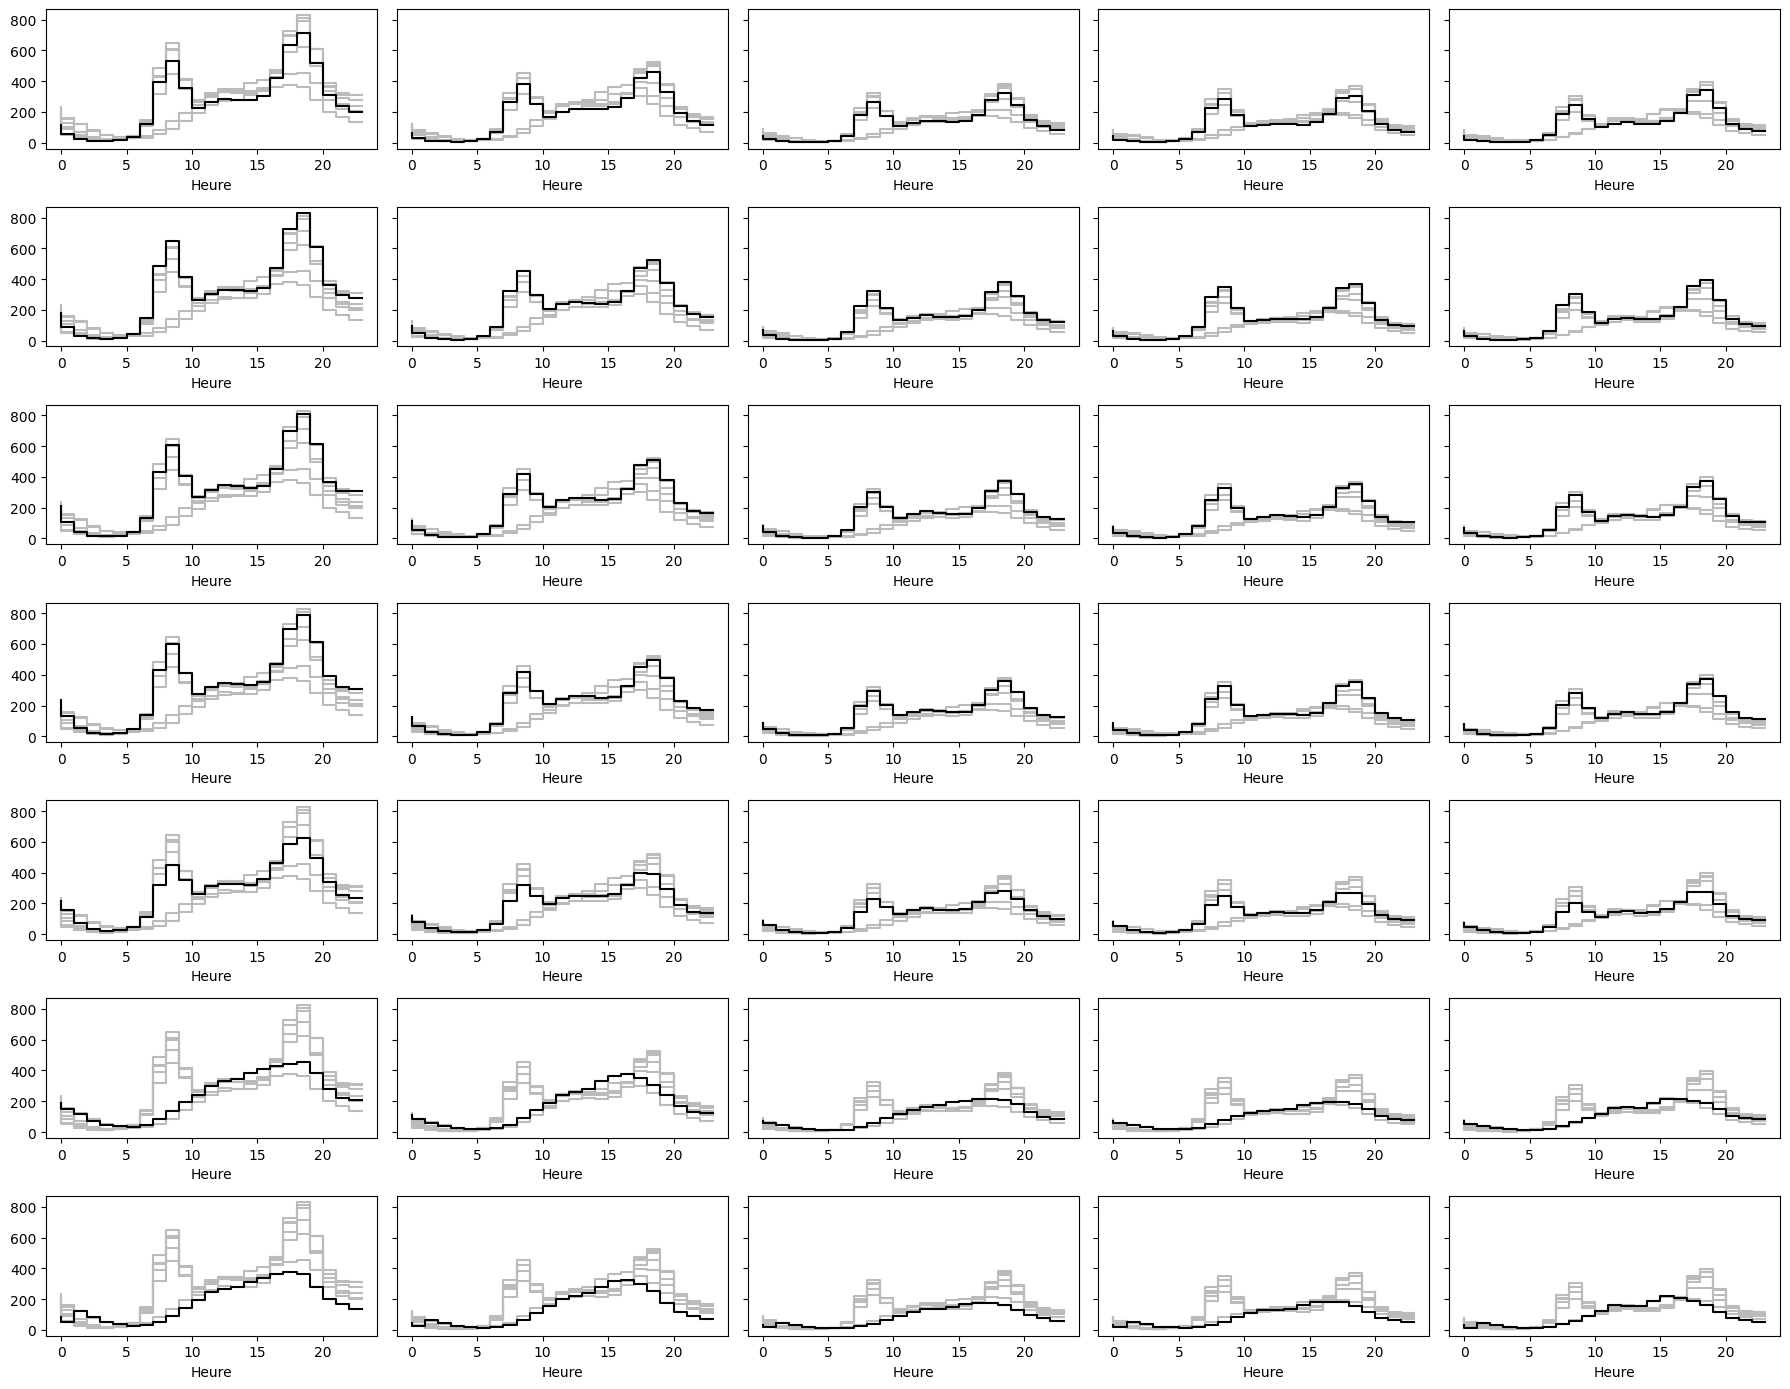

In [108]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(18, 14), sharey=True)

for i, jour in enumerate(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]):
    for j, compteur in enumerate(top5.index):
        (
            table
            [compteur]
            .pipe(lambda df: df[[c for c in df.columns if c != jour ]])
            .plot
            .line(
                ax=ax[i,j],
                drawstyle='steps',
                legend=False,
                color='#bbb'
            )
        )
        
        (
            table
            .swaplevel(axis=1)
            [jour]
            [[compteur]]
            .plot
            .line(
                ax=ax[i,j],
                drawstyle='steps',
                legend=False,
                color='black'
            )
        )
        
plt.tight_layout()


plt.show()

In [105]:
last_week = (
    comptages
    .assign(
        Jour = lambda df: df.datetime.dt.day_name(),
        Heure = lambda df: ( df.datetime.dt.hour + 2 ) % 24
    )
    .pivot_table(
        index = [comptages.datetime.dt.date, "Jour"],
        columns = ['Identifiant du site de comptage', 'Heure'],
        values = "Comptage horaire",
        #aggfunc='sum'
    )
    [top5.index]
    .iloc[-7:]
    .droplevel(0)
    .reset_index()
    .melt(id_vars="Jour")
    .pivot_table(
        index="Heure",
        columns=['Identifiant du site de comptage', "Jour"],
        values='value'
    )
)

last_week

Identifiant du site de comptage 100050876                                  \
Jour                               Friday Monday Saturday Sunday Thursday   
Heure                                                                       
0                                   153.0   75.0    113.5    NaN    173.5   
1                                    81.0   40.5     84.5    NaN     83.0   
2                                    49.0   18.5     61.5   68.0     30.0   
3                                    22.0    7.0     27.5   40.5     12.0   
4                                    18.5    8.0     19.0   26.5     14.0   
5                                     9.5   14.0     22.5   18.0     11.5   
6                                    35.5   33.5     21.0   18.5     35.5   
7                                    83.0   98.5     26.5   29.0    120.5   
8                                   270.0  387.5     55.0   47.5    427.5   
9                                   374.0  471.0    123.0   65.0    542.5   
10                                  245.0  195.0    183.0  116.0    265.5   
11                                  214.5  185.0    236.5  143.5    240.0   
12                                  303.5  216.0    334.0  147.0    313.0   
13                                  273.5  252.0    296.0  120.0    315.0   
14                                  286.5  266.0    326.5  143.5    307.0   
15                                  290.0  257.0    395.5  238.0    305.0   
16                                  290.5  268.5    441.0  274.0    285.0   
17                                  383.5  336.0    420.0  279.5    402.5   
18                                  476.0  574.0    371.0  291.0    666.5   
19                                  450.5  547.5    324.5  296.0    661.5   
20                                  307.5  313.5    234.5  233.0    408.5   
21                                  194.0  196.5    177.5  141.0    265.0   
22                                  158.5  171.5    140.0  103.0    207.5   
23                                  159.5  131.5    161.0   77.0    215.0   

Identifiant du site de comptage                   100056334                  \
Jour                            Tuesday Wednesday    Friday Monday Saturday   
Heure                                                                         
0                                 119.0     132.5      93.5   54.5     91.5   
1                                  56.5      64.5      59.5   24.0     66.0   
2                                  22.0      26.5      26.0    8.0     38.0   
3                                  10.0      15.0       9.5    4.0     23.5   
4                                   7.5       8.5       9.0    4.0     17.0   
5                                  17.0      15.0      11.0    6.5     17.0   
6                                  40.5      44.0      18.5   19.0     17.0   
7                                 126.0     117.5      49.0   63.0     22.0   
8                                 450.5     441.0     191.0  253.0     41.5   
9                                 581.5     529.0     264.5  297.0     78.0   
10                                264.0     271.0     151.0  135.5     97.0   
11                                226.0     252.5     143.0  116.0    139.5   
12                                308.5     293.0     189.0  164.0    185.0   
13                                283.0     274.0     193.0  171.0    183.0   
14                                269.0     312.0     182.5  150.0    169.0   
15                                265.5     273.0     161.5  153.0    198.5   
16                                291.5     306.0     201.5  158.5    271.0   
17                                405.5     404.0     245.5  218.5    225.5   
18                                623.5     653.0     343.0  328.5    218.0   
19                                601.0     618.5     364.5  358.0    214.0   
20                                360.0     384.5     236.0  244.5    189.5   
21                      

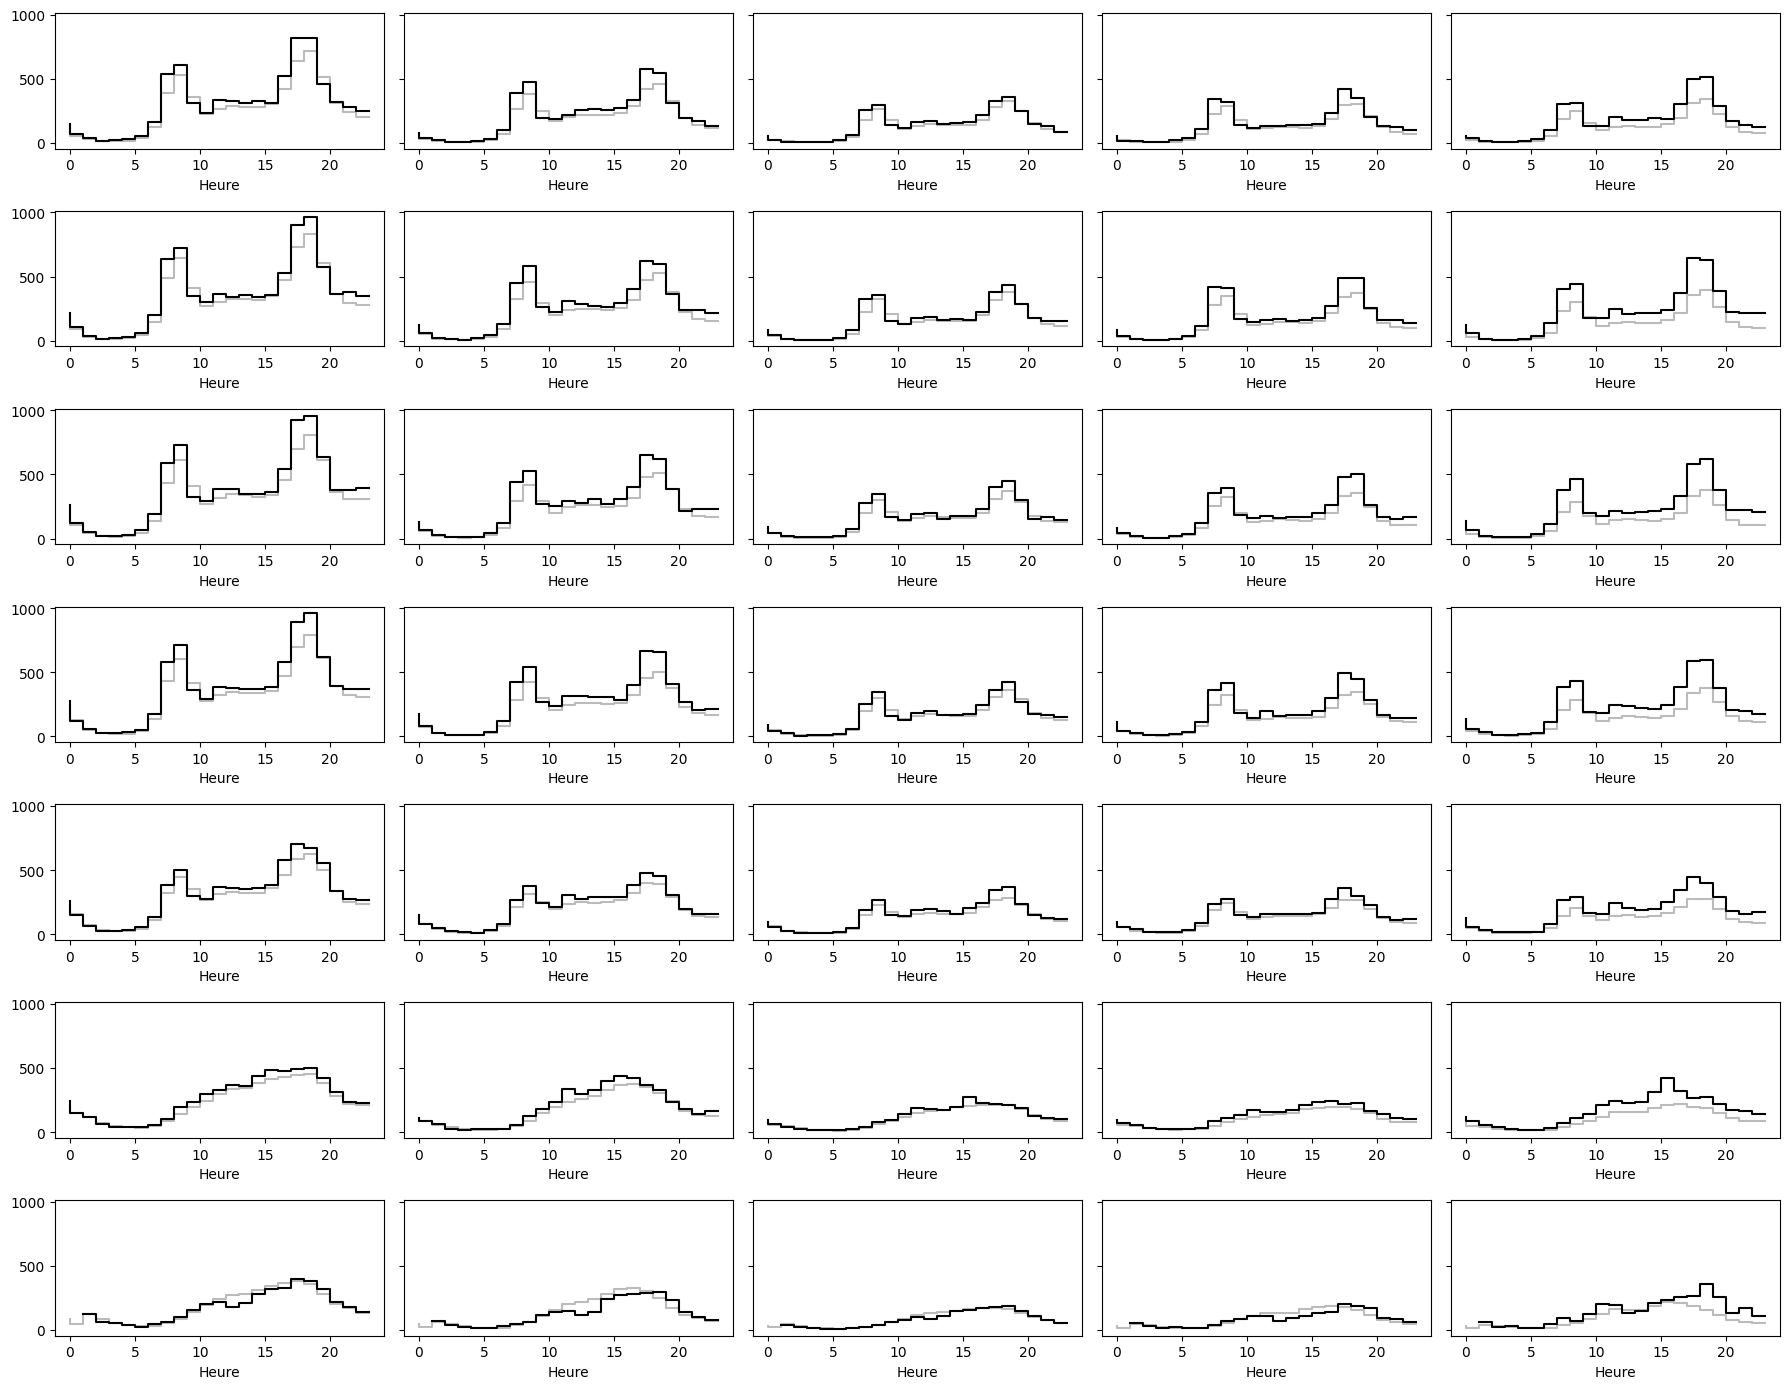

In [109]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(18, 14), sharey=True)

for i, jour in enumerate(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]):
    for j, compteur in enumerate(top5.index):
        (
            table
            .swaplevel(axis=1)
            [jour]
            [[compteur]]
            .plot
            .line(
                ax=ax[i,j],
                drawstyle='steps',
                legend=False,
                color='#bbb'
            )
        )
        
        (
            last_week
            #.swaplevel(axis=1)
            [compteur]
            [[jour]]
            .plot
            .line(
                ax=ax[i,j],
                drawstyle='steps',
                legend=False,
                color='black'
            )
        )
        
plt.tight_layout()


plt.show()